<a href="https://colab.research.google.com/github/KamranAli786320/Disease-Prediction/blob/main/finallast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
import pickle

In [2]:
# Load the dataset
hepatitis_data = pd.read_csv("/content/dataset_55_hepatitis (UPDATE1).csv")


In [3]:
hepatitis_data

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,Class
0,30,male,no,no,no,no,no,no,no,no,no,no,no,1,85,18,4,?,no,LIVE
1,50,female,no,no,yes,no,no,no,no,no,no,no,no,0.9,135,42,3.5,?,no,LIVE
2,78,female,yes,no,yes,no,no,yes,no,no,no,no,no,0.7,96,32,4,?,no,LIVE
3,31,female,?,yes,no,no,no,yes,no,no,no,no,no,0.7,46,52,4,80,no,LIVE
4,34,female,yes,no,no,no,no,yes,no,no,no,no,no,1,?,200,4,?,no,LIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,31,female,no,no,yes,no,no,no,no,no,no,no,no,2.4,423,144,4.4,77,no,DIE
208,31,female,no,no,yes,no,no,no,no,no,no,no,no,0.8,131,21,3,57,no,LIVE
209,26,female,no,no,no,no,no,no,no,no,no,no,no,2.2,185,44,3.9,72,no,DIE
210,27,female,no,no,yes,no,no,no,no,no,no,no,no,3.3,286,65,5.1,69,no,DIE


In [4]:
# Replace categorical values with numeric values
replacements = {'no': 0, 'yes': 1, 'DIE': 0, 'LIVE': 1, '?': 0, 'female': 0, 'male': 1}
hepatitis_data.replace(replacements, inplace=True)

In [5]:
hepatitis_data

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,Class
0,30,1,0,0,0,0,0,0,0,0,0,0,0,1,85,18,4,0,0,1
1,50,0,0,0,1,0,0,0,0,0,0,0,0,0.9,135,42,3.5,0,0,1
2,78,0,1,0,1,0,0,1,0,0,0,0,0,0.7,96,32,4,0,0,1
3,31,0,0,1,0,0,0,1,0,0,0,0,0,0.7,46,52,4,80,0,1
4,34,0,1,0,0,0,0,1,0,0,0,0,0,1,0,200,4,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,31,0,0,0,1,0,0,0,0,0,0,0,0,2.4,423,144,4.4,77,0,0
208,31,0,0,0,1,0,0,0,0,0,0,0,0,0.8,131,21,3,57,0,1
209,26,0,0,0,0,0,0,0,0,0,0,0,0,2.2,185,44,3.9,72,0,0
210,27,0,0,0,1,0,0,0,0,0,0,0,0,3.3,286,65,5.1,69,0,0


Living patients: 64.15 %
Dead patients: 35.85 %
Accuracy: 0.7636363636363637
Confusion Matrix:
[[21  8]
 [ 5 21]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.72      0.76        29
         1.0       0.72      0.81      0.76        26

    accuracy                           0.76        55
   macro avg       0.77      0.77      0.76        55
weighted avg       0.77      0.76      0.76        55



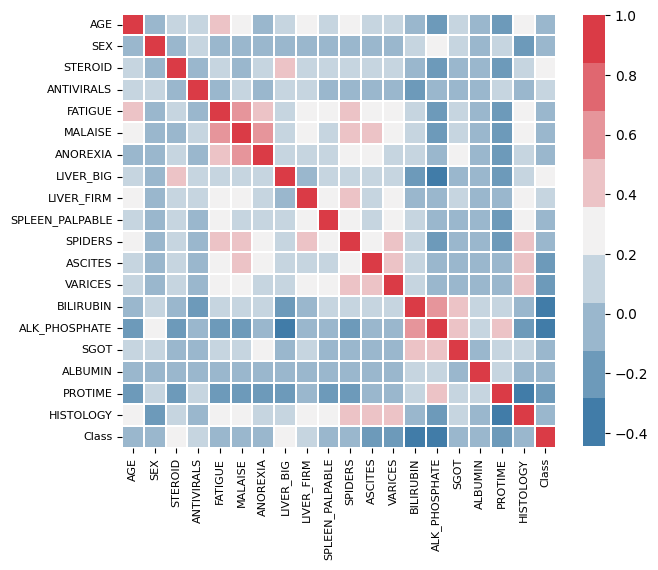

In [6]:
# Replace categorical values with numeric values
replacements = {'no': 0, 'yes': 1, 'DIE': 0, 'LIVE': 1, '?': np.nan, 'female': 0, 'male': 1}
hepatitis_data.replace(replacements, inplace=True)

# Convert all columns to numeric type
hepatitis_data = hepatitis_data.apply(pd.to_numeric, errors='coerce')

# Handle missing values with imputation
imputer = SimpleImputer(strategy='mean')  # You can use other strategies as well
hepatitis_data_imputed = pd.DataFrame(imputer.fit_transform(hepatitis_data), columns=hepatitis_data.columns)

# Display information about living and dead patients
total_of_patients = hepatitis_data_imputed.shape[0]
total_of_live_patients = (np.sum(hepatitis_data_imputed['Class'] == 1) / total_of_patients) * 100
total_of_dead_patients = (np.sum(hepatitis_data_imputed['Class'] == 0) / total_of_patients) * 100
print("Living patients:", round(total_of_live_patients, 2), "%")
print("Dead patients:", round(total_of_dead_patients, 2), "%")

# Display value counts for categorical variables
categorical_variables = ['SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER_BIG', 'LIVER_FIRM',
                          'SPLEEN_PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES', 'HISTOLOGY']
hepatitis_data_imputed[categorical_variables].apply(pd.Series.value_counts)

# Display a heatmap of correlations
corr = hepatitis_data_imputed.corr()
plt.figure(figsize=(7, 7))
cmap = sns.diverging_palette(240, 10, n=9, center='light')
sns.heatmap(corr, linewidths=.2, cmap=cmap, cbar_kws={"shrink": .8}, square=True, xticklabels=True, yticklabels=True)
plt.yticks(size=8, rotation=0)
plt.xticks(size=8, rotation=90)

# Preprocess and train the XGBoost model
interesting_values_x = ['ALBUMIN', 'ANOREXIA', 'ALK_PHOSPHATE', 'ASCITES', 'BILIRUBIN', 'PROTIME', 'SGOT', 'Class']
df = hepatitis_data_imputed[interesting_values_x]

# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the XGBoost model
model = XGBClassifier(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

# Save the model to a pickle file
pickle.dump(model, open('hepatitis_risk_predictor.pkl', 'wb'))


Living patients: 64.15 %
Dead patients: 35.85 %
Accuracy: 0.8181818181818182
Confusion Matrix:
[[22  7]
 [ 3 23]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.76      0.81        29
         1.0       0.77      0.88      0.82        26

    accuracy                           0.82        55
   macro avg       0.82      0.82      0.82        55
weighted avg       0.83      0.82      0.82        55



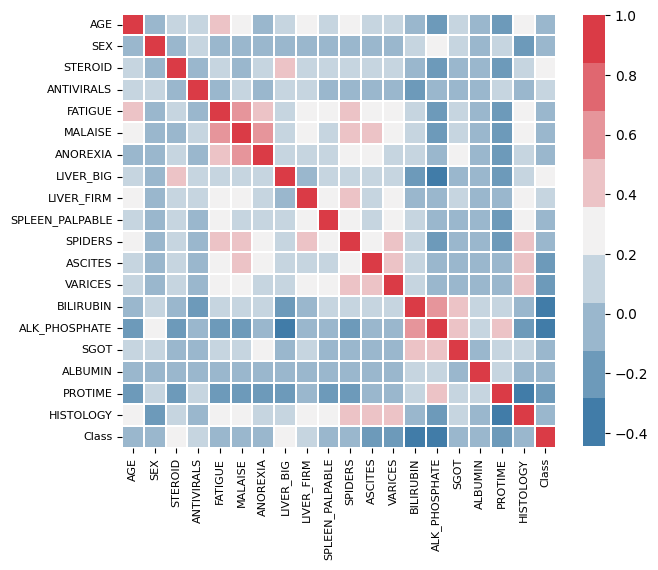

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import pickle

# Replace categorical values with numeric values
replacements = {'no': 0, 'yes': 1, 'DIE': 0, 'LIVE': 1, '?': np.nan, 'female': 0, 'male': 1}
hepatitis_data.replace(replacements, inplace=True)

# Convert all columns to numeric type
hepatitis_data = hepatitis_data.apply(pd.to_numeric, errors='coerce')

# Handle missing values with imputation
imputer = SimpleImputer(strategy='mean')
hepatitis_data_imputed = pd.DataFrame(imputer.fit_transform(hepatitis_data), columns=hepatitis_data.columns)

# Display information about living and dead patients
total_of_patients = hepatitis_data_imputed.shape[0]
total_of_live_patients = (np.sum(hepatitis_data_imputed['Class'] == 1) / total_of_patients) * 100
total_of_dead_patients = (np.sum(hepatitis_data_imputed['Class'] == 0) / total_of_patients) * 100
print("Living patients:", round(total_of_live_patients, 2), "%")
print("Dead patients:", round(total_of_dead_patients, 2), "%")

# Display value counts for categorical variables
categorical_variables = ['SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER_BIG', 'LIVER_FIRM',
                          'SPLEEN_PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES', 'HISTOLOGY']
hepatitis_data_imputed[categorical_variables].apply(pd.Series.value_counts)

# Display a heatmap of correlations
corr = hepatitis_data_imputed.corr()
plt.figure(figsize=(7, 7))
cmap = sns.diverging_palette(240, 10, n=9, center='light')
sns.heatmap(corr, linewidths=.2, cmap=cmap, cbar_kws={"shrink": .8}, square=True, xticklabels=True, yticklabels=True)
plt.yticks(size=8, rotation=0)
plt.xticks(size=8, rotation=90)

# Preprocess and train the KNN model
interesting_values_x = ['ALBUMIN', 'ANOREXIA', 'ALK_PHOSPHATE', 'ASCITES', 'BILIRUBIN', 'PROTIME', 'SGOT', 'Class']
df = hepatitis_data_imputed[interesting_values_x]

# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

# Save the model to a pickle file
pickle.dump(knn_model, open('hepatitis_risk_predictor_knn.pkl', 'wb'))

In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import pickle

class HepatitisRiskPredictor:
    def __init__(self, model_path):
        # Load the pre-trained model from the pickle file
        self.model = pickle.load(open(model_path, 'rb'))
        self.scaler = None

    def preprocess_input(self, input_data):
        # Assuming input_data is a dictionary with keys matching column names in the original dataset
        input_df = pd.DataFrame([input_data])
        input_df.replace({'no': 0, 'yes': 1, 'DIE': 0, 'LIVE': 1, '?': 0, 'female': 0, 'male': 1}, inplace=True)
        input_df = input_df.astype(float)

        if self.scaler is not None:
            input_data_scaled = self.scaler.transform(input_df)
        else:
            input_data_scaled = input_df

        return input_data_scaled

    def predict(self, input_data):
        if self.model is None:
            raise ValueError("Model not loaded.")

        # Preprocess the input data
        input_data_scaled = self.preprocess_input(input_data)

        print("Preprocessed input data:")
        print(input_data_scaled)

        # Make predictions on the input data
        predictions = self.model.predict(input_data_scaled)

        return predictions


# Example of how to use the HepatitisRiskPredictor class
model_path = '/content/hepatitis_risk_predictor_knn.pkl'
risk_predictor = HepatitisRiskPredictor(model_path)

# Example input data
user_input = {
    'ALBUMIN': 4,
    'ANOREXIA': 0,
    'ALK_PHOSPHATE': 85,
    'ASCITES': 0,
    'BILIRUBIN': 1,
    'PROTIME': '?',
    'SGOT': 18
}

# Make predictions using the loaded model
predictions = risk_predictor.predict(user_input)

print(f"Predictions: {'LIVE' if predictions == 1 else 'DIE'}")


Preprocessed input data:
   ALBUMIN  ANOREXIA  ALK_PHOSPHATE  ASCITES  BILIRUBIN  PROTIME  SGOT
0      4.0       0.0           85.0      0.0        1.0      0.0  18.0
Predictions: DIE


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [9]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pickle

class HepatitisRiskPredictor:
    def __init__(self, model_path):
        # Load the pre-trained model from the pickle file
        self.model = pickle.load(open(model_path, 'rb'))
        self.scaler = None

    def preprocess_input(self, input_data):
        # Assuming input_data is a dictionary with keys matching column names in the original dataset
        input_df = pd.DataFrame([input_data])
        input_df.replace({'no': 0, 'yes': 1, 'DIE': 0, 'LIVE': 1, '?': 1, 'female': 0, 'male': 1}, inplace=True)
        input_df = input_df.astype(float)

        if self.scaler is not None:
            input_data_scaled = self.scaler.transform(input_df)
        else:
            input_data_scaled = input_df

        return input_data_scaled

    def predict(self, input_data):
        if self.model is None:
            raise ValueError("Model not loaded.")

        # Preprocess the input data
        input_data_scaled = self.preprocess_input(input_data)

        print("Preprocessed input data:")
        print(input_data_scaled)

        # Make predictions on the input data
        predictions = self.model.predict(input_data_scaled)

        return predictions

# Example of how to use the HepatitisRiskPredictor class for prediction
model_path = 'hepatitis_risk_predictor_knn.pkl'
risk_predictor = HepatitisRiskPredictor(model_path)

# Example input data for prediction
user_input = {
    'ALBUMIN': 1,
    'ANOREXIA': 1,
    'ALK_PHOSPHATE': 1,
    'ASCITES': 0,
    'BILIRUBIN': 1,
    'PROTIME': 1,
    'SGOT': 1
}

# Make predictions using the loaded model
predictions = risk_predictor.predict(user_input)

print(f"Predictions: {'LIVE' if predictions == 1 else 'DIE'}")


Preprocessed input data:
   ALBUMIN  ANOREXIA  ALK_PHOSPHATE  ASCITES  BILIRUBIN  PROTIME  SGOT
0      1.0       1.0            1.0      0.0        1.0      1.0   1.0
Predictions: DIE


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [10]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import pickle

class HepatitisRiskPredictor:
    def __init__(self, model_path):
        # Load the pre-trained model from the pickle file
        self.model = pickle.load(open(model_path, 'rb'))
        self.scaler = None

    def preprocess_input(self, input_data):
        # Assuming input_data is a dictionary with keys matching column names in the original dataset
        input_df = pd.DataFrame([input_data])
        input_df.replace({'no': 0, 'yes': 1, 'DIE': 0, 'LIVE': 1, '?': np.nan, 'female': 0, 'male': 1}, inplace=True)
        input_df = input_df.astype(float)

        if self.scaler is not None:
            input_data_scaled = self.scaler.transform(input_df)
        else:
            input_data_scaled = input_df

        return input_data_scaled

    def train_model(self, X, y):
        # Apply SMOTE to balance the dataset
        smote = SMOTE(random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X, y)

        # Split the resampled dataset into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

        # Standardize features
        self.scaler = StandardScaler()
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)

        # Build the KNN model with hyperparameter tuning using GridSearchCV
        param_grid = {'n_neighbors': [3, 5, 7, 9]}
        knn_model = KNeighborsClassifier()
        grid_search = GridSearchCV(knn_model, param_grid, cv=5)
        grid_search.fit(X_train_scaled, y_train)

        # Print the best hyperparameters
        print("Best hyperparameters:", grid_search.best_params_)

        # Train the model with the best hyperparameters
        self.model = grid_search.best_estimator_
        self.model.fit(X_train_scaled, y_train)

        # Make predictions on the test set
        y_pred = self.model.predict(X_test_scaled)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred)

        print(f"Accuracy: {accuracy}")
        print(f"Confusion Matrix:\n{conf_matrix}")
        print(f"Classification Report:\n{classification_rep}")

    def save_model(self, filename):
        if self.model is not None:
            with open(filename, 'wb') as model_file:
                pickle.dump(self.model, model_file)
                print(f"Model saved to {filename}")
        else:
            print("No model to save. Train the model first.")

    def predict(self, input_data):
        if self.model is None:
            raise ValueError("Model not loaded.")

        # Preprocess the input data
        input_data_scaled = self.preprocess_input(input_data)

        print("Preprocessed input data:")
        print(input_data_scaled)

        # Make predictions on the input data
        predictions = self.model.predict(input_data_scaled)

        return predictions

# Load your hepatitis dataset
# hepatitis_data = pd.read_csv('your_hepatitis_dataset.csv')

# Example of how to use the HepatitisRiskPredictor class for training and prediction
model_path = 'hepatitis_risk_predictor_knn.pkl'
risk_predictor = HepatitisRiskPredictor(model_path)

# Preprocess data and train the model
interesting_values_x = ['ALBUMIN', 'ANOREXIA', 'ALK_PHOSPHATE', 'ASCITES', 'BILIRUBIN', 'PROTIME', 'SGOT', 'Class']
df = hepatitis_data[interesting_values_x]

# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

risk_predictor.train_model(X, y)

# Save the updated model
risk_predictor.save_model('hepatitis_risk_predictor_knn_updated.pkl')

# Example input data for prediction
user_input = {
    'ALBUMIN': 4,
    'ANOREXIA': 0,
    'ALK_PHOSPHATE': 85,
    'ASCITES': 0,
    'BILIRUBIN': 1,
    'PROTIME': 1,
    'SGOT': 18
}

# Make predictions using the updated model
predictions = risk_predictor.predict(user_input)

print(f"Predictions: {'LIVE' if predictions == 1 else 'DIE'}")


Best hyperparameters: {'n_neighbors': 5}
Accuracy: 0.8363636363636363
Confusion Matrix:
[[22  7]
 [ 2 24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.76      0.83        29
           1       0.77      0.92      0.84        26

    accuracy                           0.84        55
   macro avg       0.85      0.84      0.84        55
weighted avg       0.85      0.84      0.84        55

Model saved to hepatitis_risk_predictor_knn_updated.pkl
Preprocessed input data:
[[ 0.37091277 -0.39275351 -0.49173805 -0.28213825 -0.50061441 -1.39960613
  -0.77003292]]
Predictions: LIVE


In [11]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import pickle

class HepatitisRiskPredictor:
    def __init__(self, model_path):
        # Load the pre-trained model from the pickle file
        self.model = pickle.load(open(model_path, 'rb'))
        self.scaler = None

    def preprocess_input(self, input_data):
        # Assuming input_data is a dictionary with keys matching column names in the original dataset
        input_df = pd.DataFrame([input_data])
        input_df.replace({'no': 0, 'yes': 1, 'DIE': 0, 'LIVE': 1, '?': np.nan, 'female': 0, 'male': 1}, inplace=True)
        input_df = input_df.astype(float)

        if self.scaler is not None:
            input_data_scaled = self.scaler.transform(input_df)
        else:
            input_data_scaled = input_df

        return input_data_scaled

    def train_model(self, X, y):
        # Apply SMOTE to balance the dataset
        smote = SMOTE(random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X, y)

        # Split the resampled dataset into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

        # Standardize features
        self.scaler = StandardScaler()
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)

        # Build the KNN model with hyperparameter tuning using GridSearchCV
        param_grid = {'n_neighbors': [3, 5, 7, 9]}
        knn_model = KNeighborsClassifier()
        grid_search = GridSearchCV(knn_model, param_grid, cv=5)
        grid_search.fit(X_train_scaled, y_train)

        # Print the best hyperparameters
        print("Best hyperparameters:", grid_search.best_params_)

        # Train the model with the best hyperparameters
        self.model = grid_search.best_estimator_
        self.model.fit(X_train_scaled, y_train)

        # Make predictions on the test set
        y_pred = self.model.predict(X_test_scaled)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred)

        print(f"Accuracy: {accuracy}")
        print(f"Confusion Matrix:\n{conf_matrix}")
        print(f"Classification Report:\n{classification_rep}")

    def save_model(self, filename):
        if self.model is not None:
            with open(filename, 'wb') as model_file:
                pickle.dump(self.model, model_file)
                print(f"Model saved to {filename}")
        else:
            print("No model to save. Train the model first.")

    def predict(self, input_data):
        if self.model is None:
            raise ValueError("Model not loaded.")

        # Preprocess the input data
        input_data_scaled = self.preprocess_input(input_data)

        print("Preprocessed input data:")
        print(input_data_scaled)

        # Make predictions on the input data
        predictions = self.model.predict(input_data_scaled)

        return predictions

# Load your hepatitis dataset
# hepatitis_data = pd.read_csv('your_hepatitis_dataset.csv')

# Example of how to use the HepatitisRiskPredictor class for training and prediction
model_path = 'hepatitis_risk_predictor_knn.pkl'

In [12]:
risk_predictor = HepatitisRiskPredictor(model_path)

# Preprocess data and train the model
interesting_values_x = ['ALBUMIN', 'ANOREXIA', 'ALK_PHOSPHATE', 'ASCITES', 'BILIRUBIN', 'PROTIME', 'SGOT', 'Class']
df = hepatitis_data[interesting_values_x]

# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

risk_predictor.train_model(X, y)

Best hyperparameters: {'n_neighbors': 5}
Accuracy: 0.8363636363636363
Confusion Matrix:
[[22  7]
 [ 2 24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.76      0.83        29
           1       0.77      0.92      0.84        26

    accuracy                           0.84        55
   macro avg       0.85      0.84      0.84        55
weighted avg       0.85      0.84      0.84        55



In [13]:
# # Save the updated model
# risk_predictor.save_model('hepatitis_risk_predictor_knn_updated.pkl')

# Example input data for prediction
user_input = {
    'ALBUMIN': 2.8,
    'ANOREXIA': 1,
    'ALK_PHOSPHATE': 118,
    'ASCITES': 1,
    'BILIRUBIN':1.2,
    'PROTIME':1,
    'SGOT': 16
}

# Make predictions using the updated model
predictions = risk_predictor.predict(user_input)

print(f"Predictions: {'LIVE' if predictions == 1 else 'DIE'}")

Preprocessed input data:
[[-0.63368906  2.5461262  -0.21499047  3.54436172 -0.38185712 -1.39960613
  -0.79144191]]
Predictions: DIE


In [14]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import joblib

# Load the saved model
risk_predictor = joblib.load('hepatitis_risk_predictor_knn_updated.pkl')

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1("User Input Form"),

    # Input components for each feature
    dcc.Input(id='albumin-input', type='number', placeholder="ALBUMIN"),
    dcc.Input(id='anorexia-input', type='number', placeholder="ANOREXIA"),
    dcc.Input(id='alk-phosphate-input', type='number', placeholder="ALK_PHOSPHATE"),
    dcc.Input(id='ascites-input', type='number', placeholder="ASCITES"),
    dcc.Input(id='bilirubin-input', type='number', placeholder="BILIRUBIN"),
    dcc.Input(id='protime-input', type='number', placeholder="PROTIME"),
    dcc.Input(id='sgot-input', type='number', placeholder="SGOT"),

    # Button to save input and predict
    html.Button('Save Input & Predict', id='predict-button'),

    # Output for saved user input and prediction
    html.Div([
        html.Div(id='user-input-output'),
        html.Div(id='prediction-output')
    ])
])

# Stored user input
user_input = {}

# Define callback to save user input and make predictions
@app.callback(
    [
        Output('user-input-output', 'children'),
        Output('prediction-output', 'children')
    ],
    [Input('predict-button', 'n_clicks')],
    [
        State('albumin-input', 'value'),
        State('anorexia-input', 'value'),
        State('alk-phosphate-input', 'value'),
        State('ascites-input', 'value'),
        State('bilirubin-input', 'value'),
        State('protime-input', 'value'),
        State('sgot-input', 'value')
    ]
)
def predict_user_input(n_clicks, albumin, anorexia, alk_phosphate, ascites, bilirubin, protime, sgot):
    global user_input

    if n_clicks is not None:
        user_input = {
            'ALBUMIN': albumin,
            'ANOREXIA': anorexia,
            'ALK_PHOSPHATE': alk_phosphate,
            'ASCITES': ascites,
            'BILIRUBIN': bilirubin,
            'PROTIME': protime,
            'SGOT': sgot
        }

        # Make predictions using the updated model
        predictions = risk_predictor.predict([list(user_input.values())])

        user_input_output = f"User Input Saved: {user_input}"
        prediction_output = f"Predictions: {'LIVE' if predictions[0] == 1 else 'DIE'}"

        return user_input_output, prediction_output

    return "", ""

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


ModuleNotFoundError: No module named 'dash'

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick
---
Name: imbalanced-learn
Version: 0.10.1
Summary: Toolbox for imbalanced dataset in machine learning.
Home-page: https://github.com/scikit-learn-contrib/imbalanced-learn
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scikit-learn, scipy, threadpoolctl
Required-by: 


In [ ]:
pip install pdf2image

In [ ]:
from pdf2image import convert_from_path


In [ ]:
pip show poppler

In [ ]:
pip install poppler

ERROR: Could not find a version that satisfies the requirement poppler (from versions: none)
ERROR: No matching distribution found for poppler


In [ ]:
pages = convert_from_path(r'docs\prescription\pre_1.pdf', poppler_path=r'd:\poppler-21.02.0\library\bin')


PDFInfoNotInstalledError: Unable to get page count. Is poppler installed and in PATH?

In [ ]:
!pip install pdf2image

In [ ]:

import os
from pdf2image import convert_from_path

# Get the path to the PDF file
pdf_path = '/content/Kamran Ali Digital.pdf'

# Convert the PDF file to images
pages = convert_from_path(pdf_path)

# Save the images to disk
for i, page in enumerate(pages):
    image_path = os.path.join('/contents/images', f'page_{i}.jpg')
    page.save(image_path, 'JPEG')


PDFInfoNotInstalledError: Unable to get page count. Is poppler installed and in PATH?